In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gaussian_kernel(x,x_query,tau):
    return np.exp(-(x-x_query)**2/(2*tau**2))

In [19]:
def locally_weighted_regression(x,y,x_query,tau):
    x_b=np.c_[np.ones(len(x)),x]
    x_t_b=np.array([1,x_query])
    #compute the weights
    w=np.diag(gaussian_kernel(x,x_query,tau))
    theta=np.linalg.inv(x_b.T@w@x_b@x_b.T@w@y)
    return theta@x_t_b

RuntimeError: matplotlib does not support generators as input

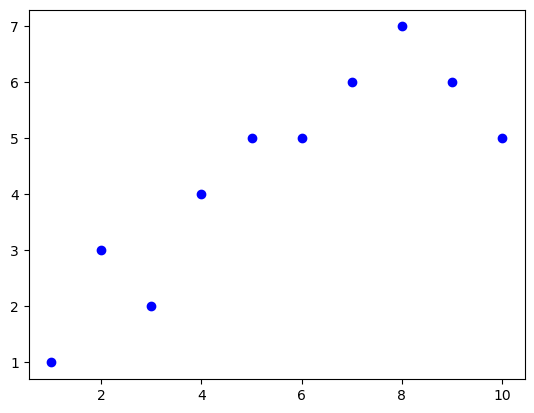

In [21]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([1,3,2,4,5,5,6,7,6,5])
x_b=np.c_[np.ones(len(x)),x]
x_query=np.linspace(1,10,100)
tau=1.0
y_lwr=np.array(locally_weighted_regression(x,y,x_q,tau) for x_q in x_query)
plt.scatter(x,y,color="blue",label="Actual")
plt.scatter(x_query,y_lwr,color="red",label="predicted")
plt.legend()
plt.show()